In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modelling
from kmodes.kmodes import KModes


In [2]:
train_df = pd.read_csv(r'D:\Praktikum, Self Project, Tubes, Competition, Webinar\Self Project - Kaggle Project or Data Analytics Competition\DAC PRS ITS\DAC-20210713T045045Z-001\DAC\Train.csv', parse_dates=['time_date', 'dealing_date', 'buying_date'])
test_df = pd.read_csv(r'D:\Praktikum, Self Project, Tubes, Competition, Webinar\Self Project - Kaggle Project or Data Analytics Competition\DAC PRS ITS\DAC-20210713T045045Z-001\DAC\Test.csv', parse_dates=['time_date', 'dealing_date', 'buying_date'])
sample_sub = pd.read_csv(r'D:\Praktikum, Self Project, Tubes, Competition, Webinar\Self Project - Kaggle Project or Data Analytics Competition\DAC PRS ITS\DAC-20210713T045045Z-001\DAC\Sample Submission DAC.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         343583 non-null  int64         
 1   time_date          343583 non-null  datetime64[ns]
 2   site               343583 non-null  int64         
 3   continent_id       343583 non-null  int64         
 4   buyer_country      343583 non-null  int64         
 5   buyer_region       343583 non-null  int64         
 6   buyer_city         343583 non-null  int64         
 7   distance           145685 non-null  float64       
 8   buyer_id           343583 non-null  int64         
 9   mobile             343583 non-null  int64         
 10  package            343583 non-null  int64         
 11  channel_id         343583 non-null  int64         
 12  buying_date        342885 non-null  datetime64[ns]
 13  dealing_date       342885 non-null  datetime

In [4]:
train_df[['buyer_city', 'regency_market', 'destination_type']].head()

,buyer_city,regency_market,destination_type
0,48862,50,1
1,48862,50,1
2,48862,50,1
3,35390,50,1
4,35390,50,1


We drop variable that we don't set as predictor variable clustering. Three variable we use as predictor:
- buyer_city
- regency_market
- destination_type

In [5]:
train_df = train_df.drop(columns=['Unnamed: 0', 'dealing', 'cnt', 'regency_cluster'])
test_df = test_df.drop(columns=['Unnamed: 0', 'id'])

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_date          21018 non-null  datetime64[ns]
 1   site               21018 non-null  int64         
 2   continent_id       21018 non-null  int64         
 3   buyer_country      21018 non-null  int64         
 4   buyer_region       21018 non-null  int64         
 5   buyer_city         21018 non-null  int64         
 6   distance           11167 non-null  float64       
 7   buyer_id           21018 non-null  int64         
 8   mobile             21018 non-null  int64         
 9   package            21018 non-null  int64         
 10  channel_id         21018 non-null  int64         
 11  buying_date        21018 non-null  datetime64[ns]
 12  dealing_date       21018 non-null  datetime64[ns]
 13  adults             21018 non-null  int64         
 14  childr

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   time_date          343583 non-null  datetime64[ns]
 1   site               343583 non-null  int64         
 2   continent_id       343583 non-null  int64         
 3   buyer_country      343583 non-null  int64         
 4   buyer_region       343583 non-null  int64         
 5   buyer_city         343583 non-null  int64         
 6   distance           145685 non-null  float64       
 7   buyer_id           343583 non-null  int64         
 8   mobile             343583 non-null  int64         
 9   package            343583 non-null  int64         
 10  channel_id         343583 non-null  int64         
 11  buying_date        342885 non-null  datetime64[ns]
 12  dealing_date       342885 non-null  datetime64[ns]
 13  adults             343583 non-null  int64   

## Data Preparation

We combine train_df with test_df

In [8]:
train_test_df = pd.concat([train_df, test_df])
train_test_df_copy = train_test_df[['buyer_city', 'regency_market', 'destination_type']]

In [9]:
#How many missing value are there
train_test_df_copy.isnull().sum()

buyer_city          0
regency_market      0
destination_type    0
dtype: int64

## Modelling
1. Kmodes with Cao initialization

In [10]:
km_cao = KModes(n_clusters=37, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(train_test_df_copy)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12655, cost: 513965.0
Run 1, iteration: 2/100, moves: 1023, cost: 513965.0


In [11]:
# predicted cluster
fitClusters_cao

array([ 0,  0,  0, ..., 22, 17, 17], dtype=uint16)

In [12]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = train_test_df_copy.columns

In [13]:
# Mode of the clusters
clusterCentroidsDf

,buyer_city,regency_market,destination_type
0,5703,50,1
1,3169,182,1
2,5224,105,1
3,48862,70,1
4,4924,204,1
5,42328,106,1
6,9527,8,1
7,24103,77,1
8,41641,198,1
9,2096,126,1


## Evaluation
Evaluate cluster criteria

In [14]:
cost = [711634.0, 690085.0, 671617.0, 658308.0, 646180.0, 635852.0, 623049.0, 613057.0, 602818.0, 597658.0, 590668.0, 584692.0, 580733.0, 574846.0, 570689.0, 566334.0, 562471.0, 559006.0, 556217.0, 553898.0, 551636.0, 549098.0, 546566.0, 543897.0, 541755.0, 540150.0, 538685.0, 537294.0, 535693.0, 534385.0, 533223.0, 532412.0, 531035.0, 525010.0, 524281.0, 523136.0, 513965.0, 512896.0, 512067.0, 511329.0, 510593.0, 510008.0, 509383.0, 508883.0, 508469.0, 507985.0, 507397.0, 506973.0, 506590.0, 506103.0, 505867.0, 505487.0, 504958.0, 504536.0, 503913.0, 503622.0, 503162.0, 502674.0, 502479.0, 501973.0, 501697.0, 501513.0, 501178.0, 501017.0, 500863.0, 500470.0, 500371.0, 500052.0, 499782.0, 499680.0, 499503.0, 499350.0, 499076.0, 498853.0, 498635.0, 498582.0, 498399.0, 498257.0]

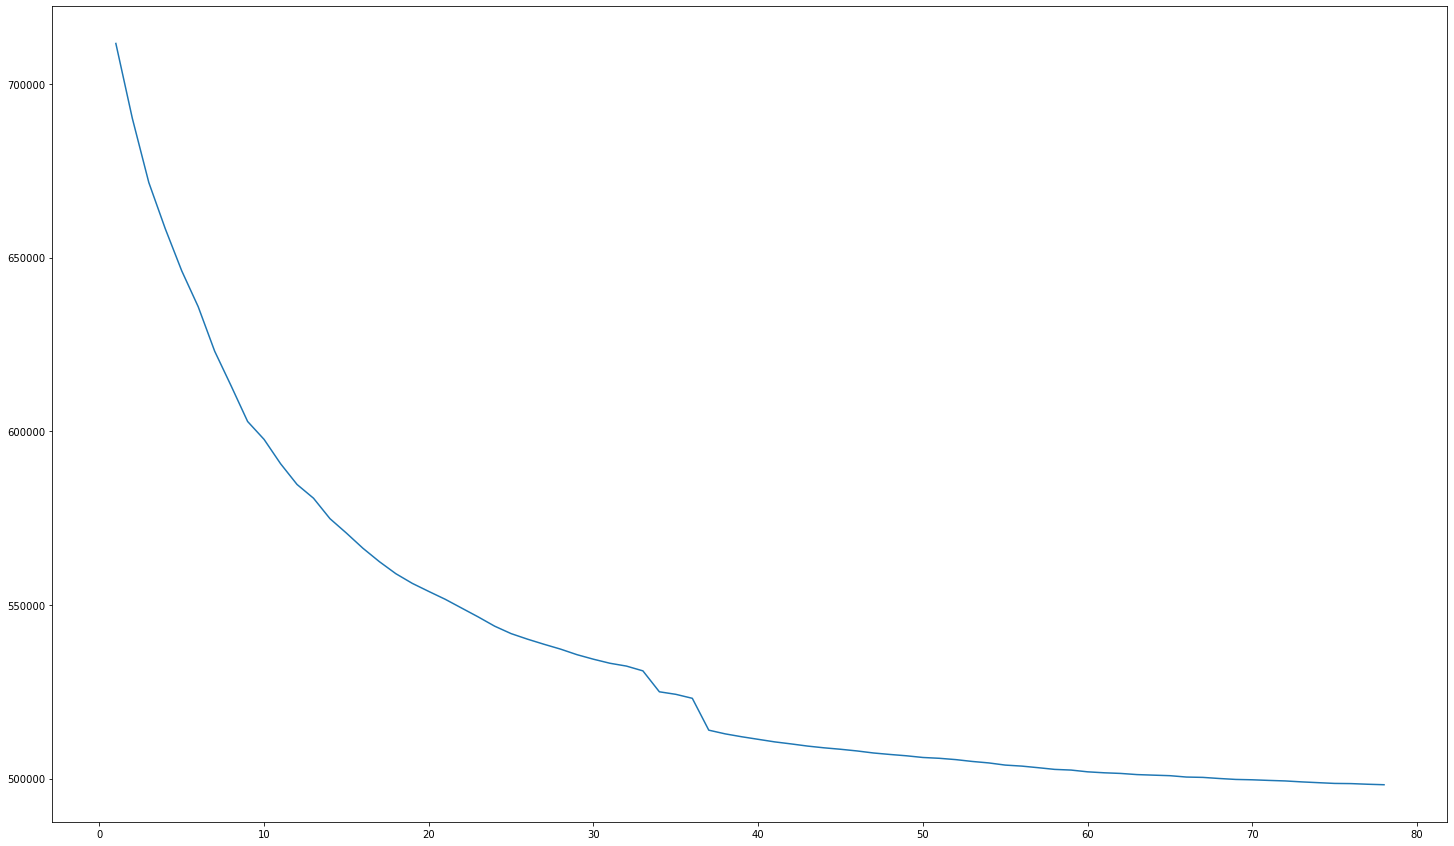

In [15]:
#set figure size
plt.figure(figsize=(25,15))

# visualize inertia
y = np.array([i for i in range(1,79,1)])
plt.plot(y,cost)

Estimasi nilai k yang optimal berada pada nilai k = 37 dengan cost = 513965.0

In [16]:
df_cost = pd.DataFrame(list(zip(y, cost)),
               columns =['k', 'Cost'])

In [17]:
df_cost = df_cost.set_index('k')

In [18]:
pd.options.display.max_rows = 100
df_cost.head(78)

,Cost
k,
1,711634.0
2,690085.0
3,671617.0
4,658308.0
5,646180.0
6,635852.0
7,623049.0
8,613057.0
9,602818.0


Combining the predicted clusters with the original DF


In [19]:
fitClusters_cao

array([ 0,  0,  0, ..., 22, 17, 17], dtype=uint16)

In [20]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['regency_cluster_predicted']

In [21]:
clustersDf

,regency_cluster_predicted
0,0
1,0
2,0
3,0
4,0
...,...
364596,0
364597,0
364598,22
364599,17


In [22]:
train_test_df

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,2014-08-11 07:46:00,2,3,66,348,48862,2234.2641,12,0,1,...,2014-08-27,2014-08-31,2,0,1,8250,1,3,2,50
1,2014-08-11 08:22:00,2,3,66,348,48862,2234.2641,12,0,1,...,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50
2,2014-08-11 08:24:00,2,3,66,348,48862,2234.2641,12,0,0,...,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50
3,2014-08-09 18:05:00,2,3,66,442,35390,913.1932,93,0,0,...,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50
4,2014-08-09 18:08:00,2,3,66,442,35390,913.6259,93,0,0,...,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21013,2015-04-28 18:04:00,2,3,66,351,54857,143.8128,9959,0,0,...,2015-04-30,2015-05-01,2,0,1,27036,1,2,50,1648
21014,2015-07-19 16:47:00,2,3,66,351,54857,3811.7386,9959,0,0,...,2015-07-31,2015-08-01,2,0,1,8253,1,6,70,19
21015,2015-04-10 14:40:00,24,2,3,59,1101,NaN,9961,0,1,...,2015-04-15,2015-04-20,1,0,1,8806,1,6,105,22
21016,2015-01-11 22:23:00,23,1,1,395,29254,292.6402,9982,1,1,...,2015-04-04,2015-04-06,2,0,1,8862,1,6,204,1466


In [23]:
train_test_df_fix = train_test_df.reset_index()
combinedDf = pd.concat([train_test_df_fix, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [24]:
clustersDf

,regency_cluster_predicted
0,0
1,0
2,0
3,0
4,0
...,...
364596,0
364597,0
364598,22
364599,17


In [25]:
combinedDf[['buyer_id', 'regency_cluster_predicted']].loc[(combinedDf['buyer_id'] == 13)].value_counts()

buyer_id  regency_cluster_predicted
13        7                            201
          0                              4
          35                             1
dtype: int64

In [26]:
submit = combinedDf[['buyer_id', 'regency_cluster_predicted']]

In [27]:
submit.value_counts()

buyer_id  regency_cluster_predicted
9436      0                            345
8225      0                            338
8264      0                            336
9542      3                            288
9399      1                            287
                                      ... 
3504      33                             1
3503      33                             1
8149      33                             1
3503      2                              1
4791      36                             1
Length: 33550, dtype: int64

In [28]:
combinedDf['regency_cluster_predicted'].value_counts()

0     171064
1      20690
2      18162
3      13147
6      12767
4      11968
5      10188
8      10061
7       9932
36      8596
10      6975
11      5837
13      5808
33      5370
9       5152
15      4322
14      4088
12      3950
16      3657
17      3439
18      2783
23      2666
21      2523
22      2510
19      2280
20      2223
24      2126
25      1545
28      1545
26      1450
27      1362
32      1311
29      1302
30      1136
35      1130
31       810
34       726
Name: regency_cluster_predicted, dtype: int64

In [29]:
import scipy
submit = submit.groupby('buyer_id').agg(lambda x: scipy.stats.mode(x)[0])

In [30]:
submit.head(20)

,regency_cluster_predicted
buyer_id,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


Export hasil prediksi ke csv

In [31]:
submit.to_csv(r'C:\Users\db_user\Desktop\Submission.csv', index = True)

## Insight and Result
1. Bagaimana distribusi pergerakan aktifitas buyer di apps setiap minggu?

In [32]:
# Pertama sebelum memvisualisasikan terhadap waktu, split waktu menjadi kedalam minggu, hari, dsb
combinedDf['timestamp_year_month'] = combinedDf['time_date'].dt.strftime('%Y-%m')
combinedDf['timestamp_day_name'] = combinedDf['time_date'].dt.day_name()
combinedDf['timestamp_hours'] = combinedDf['time_date'].dt.hour

combinedDf['dealing_year_month'] = combinedDf['dealing_date'].dt.strftime('%Y-%m')
combinedDf['dealing_day_name'] = combinedDf['dealing_date'].dt.day_name()

combinedDf['buying_year_month'] = combinedDf['buying_date'].dt.strftime('%Y-%m')
combinedDf['buying_day_name'] = combinedDf['buying_date'].dt.day_name()

In [33]:
sns.set(style='darkgrid')

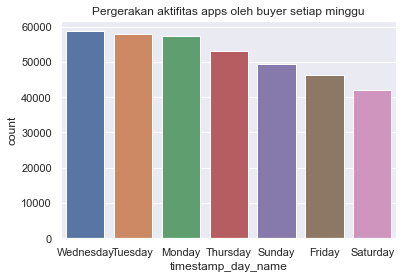

In [34]:
# Visualisasi pergerakan aktifitas apps setiap minggu nya
sns.countplot(x = 'timestamp_day_name',
              data = combinedDf,
              order = combinedDf['timestamp_day_name'].value_counts().index)
plt.title('Pergerakan aktifitas apps oleh buyer setiap minggu')
plt.show()

2. Setiap jam berapa aja aktifitas buyer mulai intens?

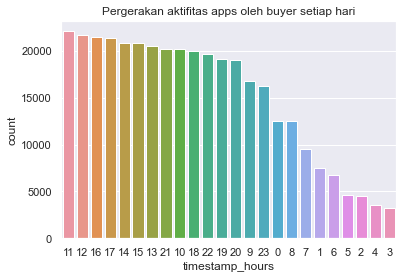

In [35]:
sns.countplot(x = 'timestamp_hours',
              data = combinedDf,
              order = combinedDf['timestamp_hours'].value_counts().index)
plt.title('Pergerakan aktifitas apps oleh buyer setiap hari')
plt.show()

Karena pergerakan bandwith aplikasi mulai intens dari jam 10, diperkuat server nya mulai dari jam segini hingga jam 10 malam. Disini kita beranggapan bahwa regency agents sebagai operator apps nya.

2. Bagaimana dengan hasil prediksi regency_cluster nya, mana yang mayoritas?

In [36]:
# Mode of the clusters
clusterCentroidsDf

,buyer_city,regency_market,destination_type
0,5703,50,1
1,3169,182,1
2,5224,105,1
3,48862,70,1
4,4924,204,1
5,42328,106,1
6,9527,8,1
7,24103,77,1
8,41641,198,1
9,2096,126,1


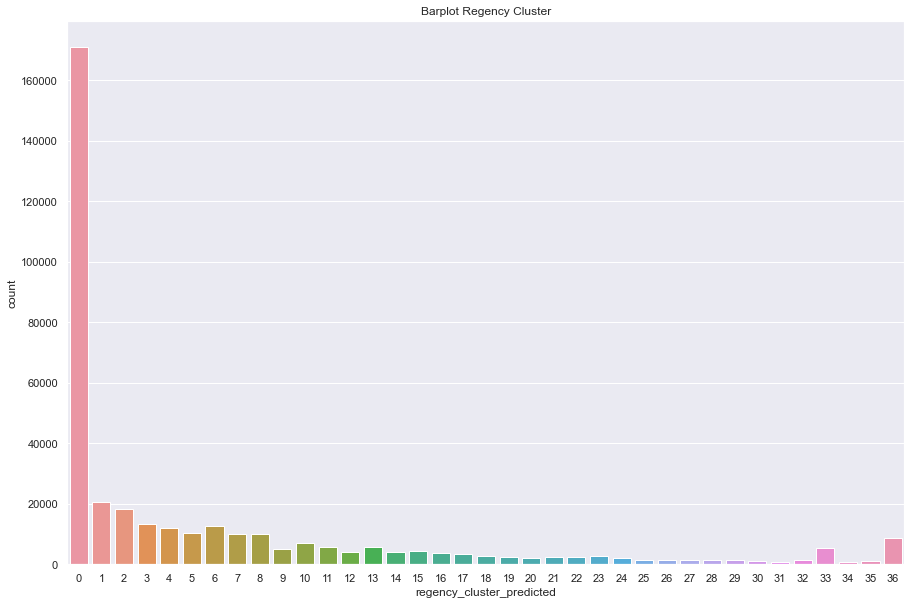

In [43]:
#set figure size
plt.figure(figsize=(15,10))

#plotting
sns.countplot(
    x='regency_cluster_predicted', data=combinedDf)
plt.title('Barplot Regency Cluster')
plt.show()

3. Mayoritas pake hp atau lainnya? 

In [38]:
def get_discrete_univariate_analysis(input_df, column):
    print('-------------'+column.upper()+'  DISTRIBUTION-----------------')
    rolled_up_df = input_df.groupby(column).size().reset_index(name='count').sort_values(['count'], ascending=False)
    count = rolled_up_df['count'].sum()
    rolled_up_df['perc'] = round((rolled_up_df['count'] / count) * 100, 2)
    rolled_up_df.index = range(1,len(rolled_up_df)+1)
    print(rolled_up_df)
    print('-------------------------------------------------------------')

def get_discrete_countplot(input_df, column):
    plt.subplots(figsize=(10,5))
    sns.countplot(train_df[column])
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title(column +' Barplot')

In [39]:
bol_col = ['mobile','package']
for bol in bol_col:
    get_discrete_univariate_analysis(combinedDf, bol)

-------------MOBILE  DISTRIBUTION-----------------
   mobile   count   perc
1       0  324006  88.87
2       1   40595  11.13
-------------------------------------------------------------
-------------PACKAGE  DISTRIBUTION-----------------
   package   count   perc
1        0  285506  78.31
2        1   79095  21.69
-------------------------------------------------------------


C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


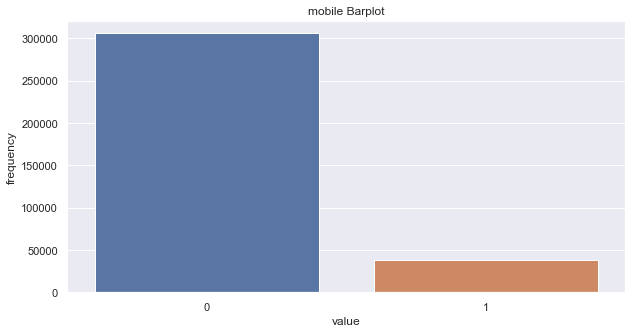

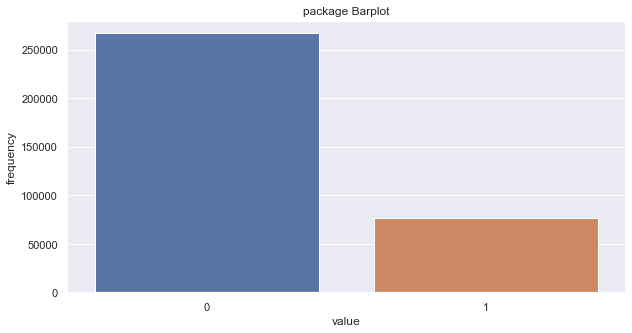

In [40]:
for bol in bol_col:
    get_discrete_countplot(combinedDf, bol)

## Analysis and Result

In [41]:
pd.options.display.max_rows = 10
for cat in cat_col:
    get_discrete_univariate_analysis(combinedDf, cat)

NameError: name 'cat_col' is not defined